<a href="https://colab.research.google.com/github/Gabylamasse/Projet-du-sale-/blob/master/TP_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 2 & Keras with Fashion-MNIST

In this TP we will uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.
4. Analyse the detail of the predictions
5. Test alternative models (convolution)

Download and install the TensorFlow 2 package. Import TensorFlow into your program:

In [61]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf

#from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


Load and prepare the [FMNIST dataset](https://github.com/zalandoresearch/fashion-mnist/). Convert the samples from integers to floating-point numbers:

In [63]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [64]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

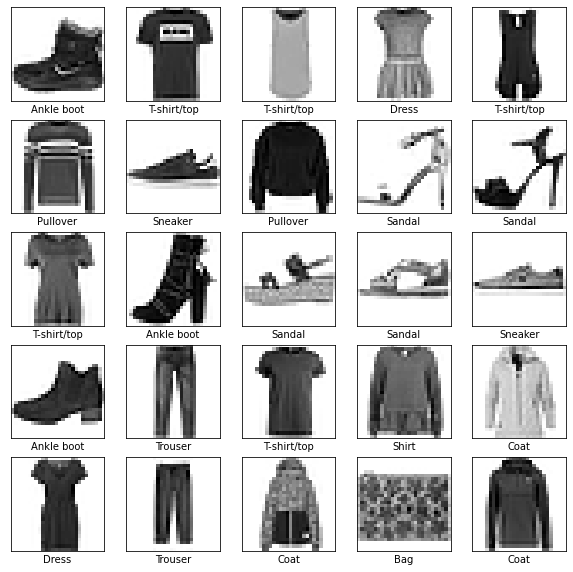

In [65]:
#plot the 25 first image of the train data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [66]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train and evaluate the model:

In [68]:
model1.fit(x_train, y_train, epochs=5)
model1.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5345 - accuracy: 0.8107
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4008 - accuracy: 0.8536
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3671 - accuracy: 0.8658
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3488 - accuracy: 0.8708
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3324 - accuracy: 0.8777
313/313 - 1s - loss: 0.3510 - accuracy: 0.8765


[0.35097071528434753, 0.8765000104904175]

The image classifier is now trained to ~87% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

Predict the labels of `x_test`, then check the prediction of the 1st image and display the corresponding image.

In [69]:
predictions = model1.predict(x_test)

In [70]:
predictions[0]


array([4.6127553e-07, 3.6316298e-08, 2.4319385e-07, 1.0740714e-07,
       7.2528664e-08, 1.8903872e-02, 4.2623191e-07, 1.3135184e-01,
       1.4567085e-05, 8.4972829e-01], dtype=float32)

In [71]:
np.argmax(predictions[0])

9

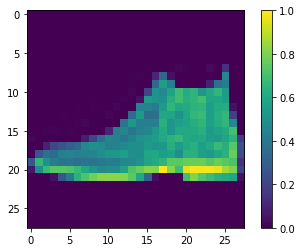

In [72]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [73]:
#plotting functions
#if the classification is correct, the caption will be blue, otherwise it'll be red


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


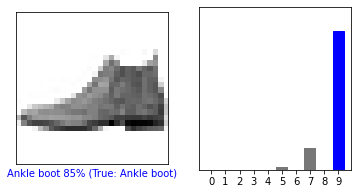

In [74]:
#plot the image 0 with the probability for each class
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [75]:
#select only the max probability for each prediction 
probs = np.amax(predictions, axis=1)
probs[0]

0.8497283

In [76]:
#create a list of indexes corresponding to the prediction sorted from the lowest to the highest 
indexes = list(range(len(probs)))
indexes.sort(key=probs.__getitem__)

In [77]:
#print the index of the lowest propability
indexes[0]

531

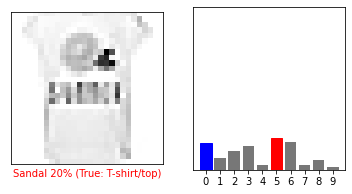

In [78]:
#plot the image of the test image which has the lowest probability 
i = indexes[0]
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [85]:
indexes = [i for i in range(len(verif)) if not verif[i]]
indexes.sort(key=probs.__getitem__,reverse=True)
indexes = indexes[:15]
print(indexes)

#plot the 15 images with the lowest probability
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for j in range(num_images):
  i = indexes[j]
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


NameError: ignored

Afficher les 25 images ayand la probabilité max la plus faible. \\
Afficher 25 images mal reconnues

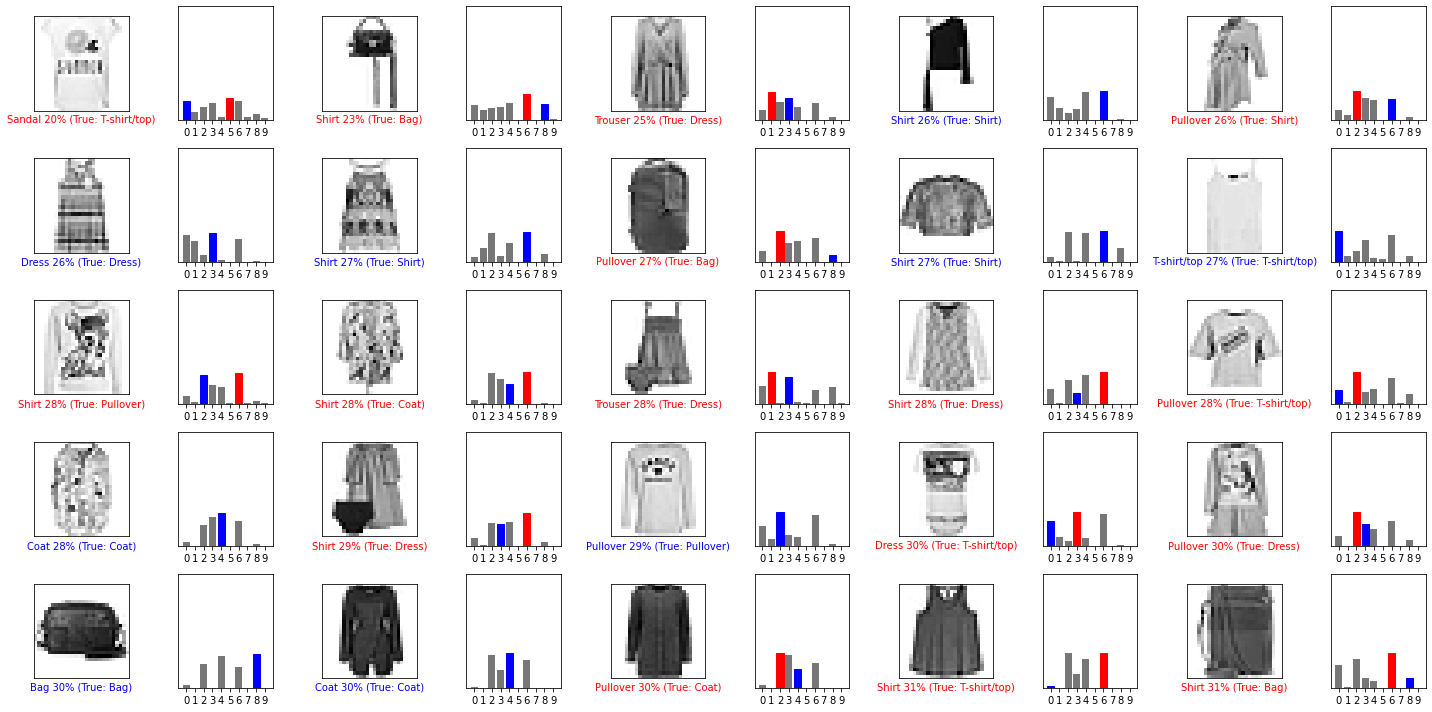

In [83]:
#Afficher les 25 images ayand la probabilité max la plus faible.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for j in range(num_images):
  i = indexes[j]
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Optional exercise: plot the worst problems (high confidence, but wrong decision)

Reshape the images and create a new model with a convolutional layer 

In [41]:
#For convolution we need (60000,28,28,1)
train_images = x_train.reshape((60000, 28, 28, 1))
test_images = x_test.reshape((10000,28,28,1))

In [42]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),               
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [44]:
model2.fit(train_images, y_train, epochs=5)
model2.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4181 - accuracy: 0.8514
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2811 - accuracy: 0.8969
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2332 - accuracy: 0.9143
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1952 - accuracy: 0.9272
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1662 - accuracy: 0.9374
313/313 - 1s - loss: 0.2717 - accuracy: 0.9107


[0.27167707681655884, 0.9107000231742859]

There are too many parameters (2 770 634 !!) and it takes a long time for training. Add a maxpooling2D layer to reduce the size

In [56]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.MaxPool2D((2,2)),               
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               147584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [57]:
model3.fit(train_images, y_train, epochs=5)

model3.evaluate(test_images,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5097 - accuracy: 0.8154
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3485 - accuracy: 0.8733
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3090 - accuracy: 0.8852
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2854 - accuracy: 0.8946
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2658 - accuracy: 0.9012
313/313 - 1s - loss: 0.2838 - accuracy: 0.8980


[0.2838081419467926, 0.8980000019073486]

Stack convolutional and maxpool layers

In [ ]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),                     
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 32)              

In [ ]:
model4.fit(train_images, y_train, epochs=5)

model4.evaluate(test_images,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 635us/sample - loss: 0.2861 - accuracy: 0.9104
Epoch 2/5
60000/60000 [==============================] - 37s 612us/sample - loss: 0.0986 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 37s 617us/sample - loss: 0.0737 - accuracy: 0.9770
Epoch 4/5
60000/60000 [==============================] - 37s 616us/sample - loss: 0.0592 - accuracy: 0.9820
Epoch 5/5
60000/60000 [==============================] - 36s 599us/sample - loss: 0.0510 - accuracy: 0.9844
10000/1 - 2s - loss: 0.0265 - accuracy: 0.9852


[0.04857666104624513, 0.9852]

We get almost same performance with a much smaller model (thanks to the image processing by convolution)

In [80]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 5, activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, 5, activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),                    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

model5.fit(train_images, y_train, epochs=5)

model5.evaluate(test_images,  y_test, verbose=2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

[0.2732461988925934, 0.9010999798774719]